<a href="https://colab.research.google.com/github/JavaOliverLu/python/blob/master/AP4062_HW2_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
#!pip install -q keras


In [20]:
import keras
from keras.datasets import cifar10
from keras import models
from keras import layers
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [21]:
from keras import layers
from keras import models
from keras import regularizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='tanh', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001),activation='tanh'))
model.add(layers.Dense(10,activation='softmax'))

model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 188,810 (737.54 KB)

 Trainable params: 188,810 (737.54 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from keras.datasets import mnist
from keras.utils import to_categorical
train_images = train_images.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
history =model.fit(train_images, train_labels, epochs=15, batch_size=256)

Epoch 1/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 59s 292ms/step - accuracy: 0.3185 - loss: 2.0927
Epoch 2/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 277ms/step - accuracy: 0.5129 - loss: 1.5122
Epoch 3/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 276ms/step - accuracy: 0.5602 - loss: 1.3822
Epoch 4/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 275ms/step - accuracy: 0.6036 - loss: 1.2706
Epoch 5/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 281ms/step - accuracy: 0.6266 - loss: 1.1972
Epoch 6/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 276ms/step - accuracy: 0.6550 - loss: 1.1265
Epoch 7/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 276ms/step - accuracy: 0.6702 - loss: 1.0843
Epoch 8/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 54s 276ms/step - accuracy: 0.6799 - loss: 1.0642
Epoch 9/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 82s 274ms/step - accuracy: 0.6973 - loss: 1.0182
Epoch 10/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 83s 281ms/step - accuracy: 0.7045 - loss: 0.9970
Epoch 11/15
196/196 ━━━━━━━━━━━━━━━━━━━━ 81s 274ms/step - accuracy: 0.7154 - loss: 0.9711
Epoch 12/15
196/196

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.7035 - loss: 1.0098


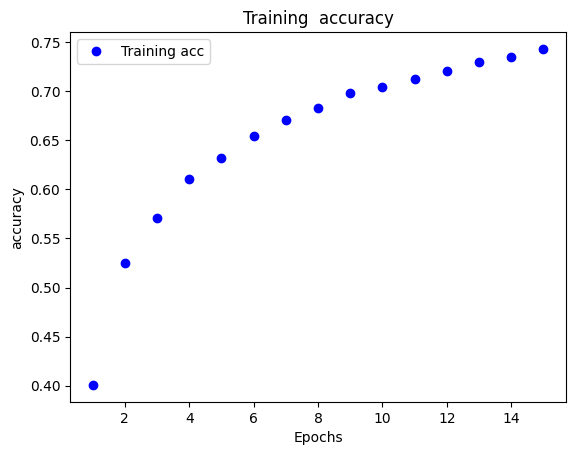

In [24]:
import matplotlib.pyplot as plt
history_dict = history.history
accuracy = history_dict['accuracy']

epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.title('Training  accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

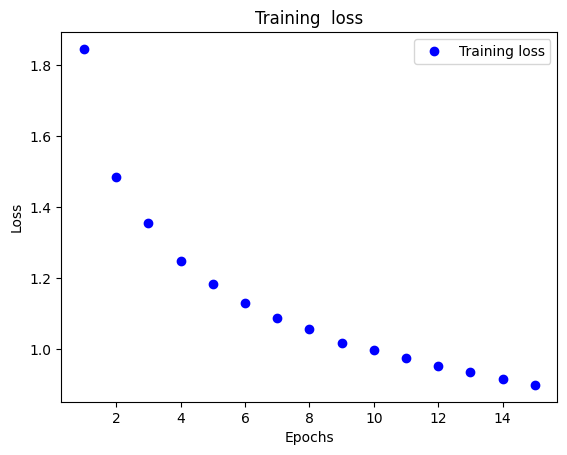

In [25]:

import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.title('Training  loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#show loss